## Car insurance claim

As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion

In [47]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [48]:
df = pd.read_csv('car_insurance_claim.csv', error_bad_lines=False)
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
ID            10302 non-null int64
KIDSDRIV      10302 non-null int64
BIRTH         10302 non-null object
AGE           10295 non-null float64
HOMEKIDS      10302 non-null int64
YOJ           9754 non-null float64
INCOME        9732 non-null object
PARENT1       10302 non-null object
HOME_VAL      9727 non-null object
MSTATUS       10302 non-null object
GENDER        10302 non-null object
EDUCATION     10302 non-null object
OCCUPATION    9637 non-null object
TRAVTIME      10302 non-null int64
CAR_USE       10302 non-null object
BLUEBOOK      10302 non-null object
TIF           10302 non-null int64
CAR_TYPE      10302 non-null object
RED_CAR       10302 non-null object
OLDCLAIM      10302 non-null object
CLM_FREQ      10302 non-null int64
REVOKED       10302 non-null object
MVR_PTS       10302 non-null int64
CLM_AMT       10302 non-null object
CAR_AGE       9663 non-null float64


In [3]:
col_with_doll = ['INCOME', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT', 'HOME_VAL']
for i in col_with_doll:
    df[i] = df[i].str.replace('$','')
    df[i] = df[i].str.replace(',','')

In [4]:
for i in col_with_doll:
    df[i] = df[i].astype(float)

In [5]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

##### filling null values of age by calculating from birth of date

In [6]:
months = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6,
          'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}
def get_fillna_age(age):
    yr=int(age[-2:])
    m=months[age[2:5]]
    #print(yr,m)
    if yr>20 and m<=10:
        return 2020-(1900+yr)
    elif yr>20 and m>10:
        return 2020-(1900+yr+1)
    else:
        return 20-yr
#print(get_fillna_age('18OCT84'))

df.AGE.fillna(value=df.BIRTH.apply(get_fillna_age), inplace=True)

##### The maximum value of YOJ i.e year of joining is 23. So lets assume that the age of insurance company is 23 years. The minimum age of driver is 16 in US. By taking these parameters in account we can fill null values of YOJ from person's age, asuming that if person's age>39, then he joined the insuarance policy when it was started. else by subtracting minimum age of driver i.e. 16 

In [7]:
def get_fillna_YOJ(age):
    if age>=39:
        return 23
    elif age<39:
        return age-16
    else:
        return 0
    
df.YOJ.fillna(value=df.AGE.apply(get_fillna_YOJ), inplace=True)

##### fillna of OCCUPATION with self_Employee

In [8]:
df.OCCUPATION.fillna(value="self_Employee", inplace=True)

##### To fill null values of  INCOME,  calulated mean of INCOME with respect to OCCUPATION. Then fill null values with this mean according to occupation

In [9]:
mean_income_occ = {}
for i in df.OCCUPATION.unique():
    if i=="self_Employee":
        mean_income_occ[i] = df.INCOME.mean().round()
    else:
        mean_income_occ[i] = df[df.OCCUPATION==i].INCOME.mean().round()

mean_income_occ

{'Professional': 75972.0,
 'z_Blue Collar': 58893.0,
 'Manager': 88067.0,
 'Clerical': 33668.0,
 'Doctor': 127561.0,
 'Lawyer': 88337.0,
 'self_Employee': 61572.0,
 'Home Maker': 12393.0,
 'Student': 6263.0}

In [10]:
def get_null_Income(occ):
    return mean_income_occ[occ]

df.INCOME.fillna(value=df.OCCUPATION.apply(get_null_Income), inplace=True)

##### The homeownership rate in the United States amounted to 65.1 percent in 2019. After making null values to 0.0, we can maintain this percentage.

In [11]:
df.HOME_VAL.fillna(value=0.0, inplace=True)

creating AGE_BINS of 10 years and apply it w.r.t. the AGE

In [12]:
df['AGE_BINS'] = pd.cut(x=df['AGE'],bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], 
                          labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80','81-90'])
df[["AGE",'AGE_BINS']]

,AGE,AGE_BINS
0,60.0,51-60
1,43.0,41-50
2,48.0,41-50
3,35.0,31-40
4,51.0,51-60
...,...,...
10297,45.0,41-50
10298,46.0,41-50
10299,48.0,41-50
10300,50.0,41-50


##### To fill null values of CAR_AGE by calculating mean w.r.t. AGE_BINS

In [13]:
mean_CarAge_AgeBins = {}
for i in df.AGE_BINS.unique():
        mean_CarAge_AgeBins[i] = df[df.AGE_BINS==i].CAR_AGE.mean().round()

mean_CarAge_AgeBins

{'51-60': 9.0,
 '41-50': 8.0,
 '31-40': 7.0,
 '21-30': 6.0,
 '61-70': 10.0,
 '71-80': 13.0,
 '11-20': 6.0,
 '81-90': 6.0}

In [14]:
def get_null_CarAge(bins):
    return mean_CarAge_AgeBins[bins]

df.CAR_AGE.fillna(value=df.AGE_BINS.apply(get_null_CarAge), inplace=True)
df.isnull().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
AGE_BINS      0
dtype: int64

In [15]:
col_with_z = ['MSTATUS', 'CAR_TYPE', 'EDUCATION', 'GENDER', 'OCCUPATION','URBANICITY']
for i in col_with_z:
    df[i] = df[i].str.replace('z_','')

In [16]:
#df.to_csv('01-data_after_fillna.csv', sep=',', encoding='utf-8', index = False)

## EDA

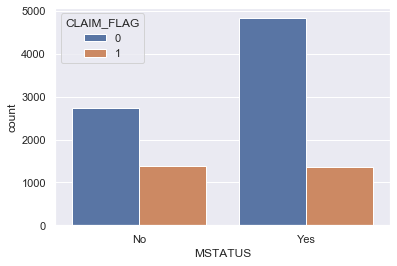

In [17]:
sns.countplot(x= df.MSTATUS,hue=df.CLAIM_FLAG)

##### plot shows that more percentage of unmarried people are claiming more car insurance than married people. We can conclude that married drivers are being more responsible compared to single drivers

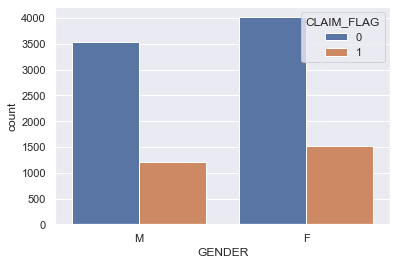

In [18]:
sns.countplot(x= df.GENDER,hue=df.CLAIM_FLAG)

##### the percentage of claiming insurance w.r.t. gender are almost equal

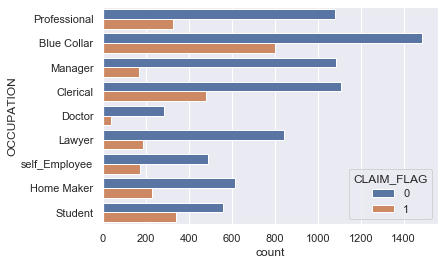

In [19]:
sns.countplot(y= df.OCCUPATION, hue=df.CLAIM_FLAG, orient='h')

1. Students and people with blue collar job calims more insurance. We can say that they used car more often or they drive roughly.
2. Doctors, Managers, Lawyes and Professionals are better drivers as their percentage of claim car insurance is low.
3. remaining all are average drives,

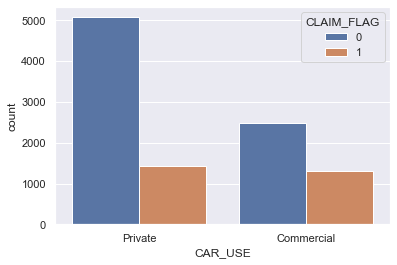

In [20]:
sns.countplot(x= df.CAR_USE,hue=df.CLAIM_FLAG)

##### As commercial cars runs more than the private cars, percentage of insurance claim commercial cars is high

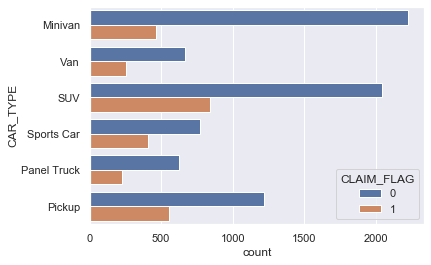

In [21]:
sns.countplot(y = df.CAR_TYPE,hue = df.CLAIM_FLAG)

##### From plot we can say tha US citizens prefer to use minivan and SUV cars. Insurance claiming rate of this car is also low. Where as Sports car users claims insurance more often as such people like to drive with high speed.

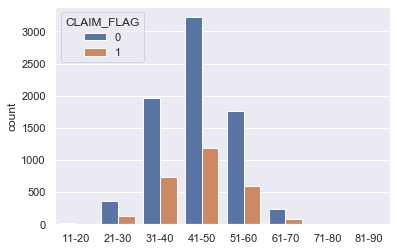

In [22]:
sns.countplot(x= sorted(df.AGE_BINS),hue=df.CLAIM_FLAG)

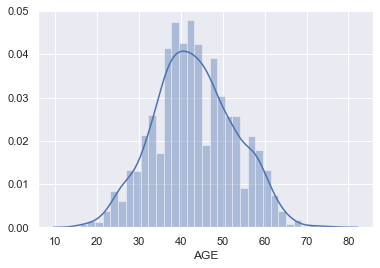

In [23]:
sns.distplot(df['AGE'][df['CLAIM_FLAG'] == 1])

##### from plot we can say that people between age of 30-60 are most likely to claim insurance. people within this range of ages drives more cars. 

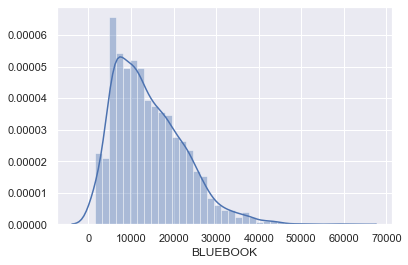

In [24]:
sns.distplot(df['BLUEBOOK'][df['CLAIM_FLAG'] == 1])

##### If individual is having minimal legal citations then claim is more.

0    2254
1     312
2     139
3      39
4       2
Name: KIDSDRIV, dtype: int64

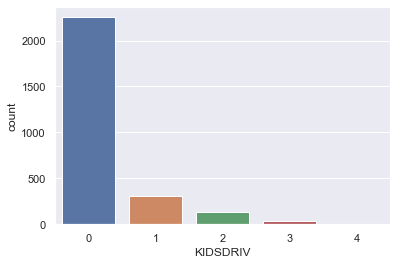

In [25]:
sns.countplot(x= df.KIDSDRIV[df['CLAIM_FLAG'] == 1])
df[df.CLAIM_FLAG==1].KIDSDRIV.value_counts()

##### As the number of kids increases the calim percentage of parents decreases, which shows that with increasing number of children people becomes more responsible when it comes to driving. People with no child have more claim percentage.

No     2145
Yes     601
Name: PARENT1, dtype: int64

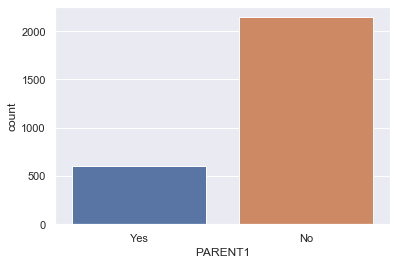

In [26]:
sns.countplot(x= df.PARENT1[df['CLAIM_FLAG'] == 1])
df[df.CLAIM_FLAG==1].PARENT1.value_counts()

##### People with no parents are tend to claim more insurance than the people with parent.

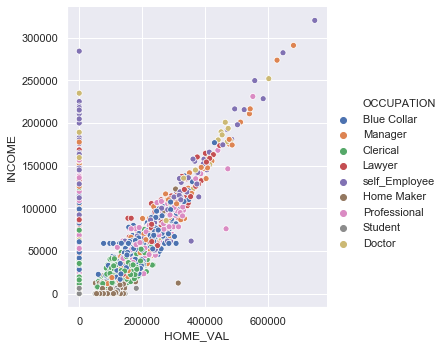

In [27]:
df_claim_flag_1 = df[df.CLAIM_FLAG==1]
sns.relplot(x="HOME_VAL", y="INCOME", hue="OCCUPATION", data=df_claim_flag_1)

1. some home Makers and students do not have home of their own.<br>
2. INCOME of home makers are also minimal w.r.t. others. <br>

0    7556
1    2746
Name: CLAIM_FLAG, dtype: int64


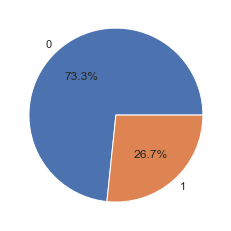

In [28]:
print(df.CLAIM_FLAG.value_counts())
plt.pie(df.CLAIM_FLAG.value_counts(), labels=df.CLAIM_FLAG.value_counts().index.tolist(),autopct='%1.1f%%')
plt.show()

## PREPROCESSING

### Balancing the Data

##### From the pie chart and catplots we can see that, the data that has been given is imbalance. That is data with CLAIM_FLAG = 0 is more than CLAIM_FLAG = 1. If we train out model with such data, then our model is most likely to learn in favour of CLAIM_FLAG = 0. This model will not be efficient for all of the train or test data. To rosolve this problem, we will make the count of CLAIM_FLAG equal by randomly selecting number of rows.

In [29]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=7)

In [30]:
grp = df.groupby("CLAIM_FLAG")

In [31]:
#count of calim_flag=1
cnt = df.CLAIM_FLAG.value_counts().min()
cnt

2746

In [32]:
balance_df = pd.concat([grp.get_group(0).head(cnt), grp.get_group(1).head(cnt)])
balance_df

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_BINS
8715,764563520,0,13JUL51,48.0,0,10.0,39213.0,No,180671.0,Yes,M,High School,Blue Collar,18,Commercial,23340.0,13,Panel Truck,no,979.0,1,No,0,0.0,1.0,0,Highly Urban/ Urban,41-50
8331,281051787,0,07JUL78,21.0,2,6.0,5411.0,No,0.0,Yes,M,<High School,Student,23,Commercial,28600.0,4,Panel Truck,no,1337.0,1,No,6,0.0,1.0,0,Highly Rural/ Rural,21-30
4614,149295193,0,28NOV49,49.0,0,15.0,94464.0,No,313932.0,Yes,M,PhD,self_Employee,47,Commercial,22300.0,1,Van,no,7016.0,3,No,0,0.0,15.0,0,Highly Urban/ Urban,41-50
1263,346696036,0,12APR52,47.0,0,10.0,64759.0,No,0.0,No,F,Masters,Manager,5,Private,15970.0,6,SUV,no,0.0,0,Yes,2,0.0,13.0,0,Highly Urban/ Urban,41-50
2128,111885786,0,13JUL33,66.0,1,14.0,45876.0,No,207530.0,Yes,F,High School,Professional,30,Private,18880.0,3,Sports Car,no,28353.0,1,No,7,0.0,1.0,0,Highly Urban/ Urban,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,195933426,0,06NOV43,56.0,2,15.0,44022.0,No,0.0,Yes,F,Bachelors,Student,41,Private,14670.0,4,Sports Car,no,8818.0,2,No,0,3783.0,13.0,1,Highly Urban/ Urban,51-60
6118,537754588,0,20FEB64,35.0,2,19.0,66452.0,Yes,0.0,No,M,Bachelors,Manager,39,Private,23100.0,6,Minivan,yes,0.0,0,No,2,3491.0,9.0,1,Highly Urban/ Urban,31-40
3239,30585255,0,02MAY63,36.0,3,14.0,167971.0,No,441721.0,Yes,M,Bachelors,Professional,33,Private,5100.0,6,Pickup,yes,2769.0,1,No,0,5396.0,13.0,1,Highly Urban/ Urban,31-40
7566,849590952,0,24AUG74,25.0,4,11.0,49576.0,Yes,160042.0,No,F,Masters,Manager,5,Private,6460.0,6,SUV,no,3862.0,2,No,1,2576.0,16.0,1,Highly Urban/ Urban,21-30


In [33]:
balance_df.CLAIM_FLAG.value_counts()

1    2746
0    2746
Name: CLAIM_FLAG, dtype: int64

In [34]:
balance_df = shuffle(balance_df, random_state=10)

### Feature Selection
###### Dropped data
ID : It is the unique identifier of claim, which is not required to build model<br>
BIRTH : As we have age in number, there is no necessity of birth date<br>
AGE_BINS : create by me for visulaization purpose

In [35]:
balance_df.drop(['ID','BIRTH','AGE_BINS'],axis = 1 ,inplace=True)
balance_df.head()

C:\anaconda\envs\py3tf2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
5959,0,39.0,0,0.0,0.0,No,0.0,No,F,Bachelors,Home Maker,41,Commercial,10070.0,4,SUV,no,3855.0,2,No,6,3312.0,14.0,1,Highly Urban/ Urban
3568,0,37.0,0,12.0,50556.0,No,186221.0,No,F,High School,Blue Collar,37,Commercial,6180.0,7,SUV,no,0.0,0,No,0,3742.0,1.0,1,Highly Urban/ Urban
8348,0,63.0,0,9.0,87516.0,No,289088.0,Yes,M,Masters,Professional,37,Private,13790.0,6,Sports Car,yes,0.0,0,No,0,0.0,14.0,0,Highly Urban/ Urban
326,1,45.0,2,0.0,0.0,Yes,0.0,No,M,<High School,Student,33,Private,6000.0,1,Pickup,no,41818.0,1,Yes,3,4423.0,1.0,1,Highly Urban/ Urban
1690,0,37.0,0,21.0,109732.0,No,0.0,No,F,Masters,Lawyer,70,Private,11740.0,1,SUV,no,9883.0,1,No,3,4716.0,14.0,1,Highly Urban/ Urban


In [36]:
balance_df_dummies = pd.get_dummies(data=balance_df)
balance_df_dummies

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_No,PARENT1_Yes,MSTATUS_No,MSTATUS_Yes,GENDER_F,GENDER_M,EDUCATION_<High School,EDUCATION_Bachelors,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_self_Employee,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Rural/ Rural,URBANICITY_Highly Urban/ Urban
5959,0,39.0,0,0.0,0.0,0.0,41,10070.0,4,3855.0,2,6,3312.0,14.0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
3568,0,37.0,0,12.0,50556.0,186221.0,37,6180.0,7,0.0,0,0,3742.0,1.0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
8348,0,63.0,0,9.0,87516.0,289088.0,37,13790.0,6,0.0,0,0,0.0,14.0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
326,1,45.0,2,0.0,0.0,0.0,33,6000.0,1,41818.0,1,3,4423.0,1.0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
1690,0,37.0,0,21.0,109732.0,0.0,70,11740.0,1,9883.0,1,3,4716.0,14.0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,1,40.0,3,10.0,89006.0,268136.0,58,25060.0,1,0.0,0,1,0.0,15.0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0
10107,0,38.0,0,12.0,26537.0,144593.0,48,5700.0,6,8256.0,3,1,4863.0,1.0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
971,0,48.0,0,11.0,136008.0,0.0,34,30280.0,10,0.0,0,2,0.0,11.0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1
8450,0,37.0,0,12.0,62010.0,0.0,33,7700.0,1,0.0,0,2,5179.0,10.0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1


In [37]:
obj_list = balance_df.select_dtypes(include = "object").columns
obj_list

Index(['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE',
       'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder

balance_df_le = balance_df.copy()
le = LabelEncoder()

for i in obj_list:
    balance_df_le[i] = le.fit_transform(balance_df_le[i])

In [39]:
balance_df_le.head(20)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
5959,0,39.0,0,0.0,0.0,0,0.0,0,0,1,3,41,0,10070.0,4,3,0,3855.0,2,0,6,3312.0,14.0,1,1
3568,0,37.0,0,12.0,50556.0,0,186221.0,0,0,2,0,37,0,6180.0,7,3,0,0.0,0,0,0,3742.0,1.0,1,1
8348,0,63.0,0,9.0,87516.0,0,289088.0,1,1,3,6,37,1,13790.0,6,4,1,0.0,0,0,0,0.0,14.0,0,1
326,1,45.0,2,0.0,0.0,1,0.0,0,1,0,7,33,1,6000.0,1,2,0,41818.0,1,1,3,4423.0,1.0,1,1
1690,0,37.0,0,21.0,109732.0,0,0.0,0,0,3,4,70,1,11740.0,1,3,0,9883.0,1,0,3,4716.0,14.0,1,1
9416,0,61.0,3,11.0,92775.0,0,294708.0,1,0,3,6,50,0,10390.0,4,4,0,0.0,0,0,2,0.0,11.0,0,1
9206,0,58.0,2,12.0,116948.0,0,350971.0,1,1,3,4,54,1,18990.0,1,5,1,0.0,0,0,0,0.0,20.0,0,1
6811,0,48.0,0,12.0,32256.0,0,175861.0,1,0,2,3,38,1,22110.0,1,0,0,0.0,0,0,1,0.0,5.0,0,0
4837,0,38.0,2,0.0,0.0,0,66812.0,1,0,2,3,17,1,13490.0,6,3,0,0.0,0,0,1,2829.0,8.0,1,1
3955,0,24.0,3,8.0,10471.0,1,0.0,0,1,3,8,25,1,13070.0,3,0,1,0.0,0,1,3,1631.0,14.0,1,1


In [40]:
#balance_df_dummies.to_csv('02-balance_df_dummies.csv', sep=',', encoding='utf-8', index = False)
#balance_df_le.to_csv('03-balance_df_le.csv', sep=',', encoding='utf-8', index = False)

## Models With Label Encoder

In [41]:
x=balance_df_le.drop(['CLAIM_FLAG'],axis=1)
y=balance_df_le['CLAIM_FLAG']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [42]:
corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,URBANICITY
KIDSDRIV,1,-0.0555565,0.489218,0.0562393,-0.0202718,0.222672,-0.00136309,0.0351788,-0.0423323,-0.0398288,-0.0122623,0.0110738,0.0324267,-0.00753095,-0.00558785,-0.0126487,-0.0463462,0.0221153,0.041454,0.0453605,0.0399004,0.059612,-0.0378079,-0.0196198
AGE,-0.0555565,1,-0.436061,0.155152,0.194866,-0.324836,0.198228,0.100403,0.0525826,0.206654,0.0887574,0.00961796,0.0400762,0.174728,-0.0055523,0.0166122,0.00506044,-0.0298636,-0.0339859,-0.0381768,-0.0790771,-0.0446259,0.182925,0.00713237
HOMEKIDS,0.489218,-0.436061,1,0.0483366,-0.159394,0.459166,-0.0955926,0.0461419,-0.110657,-0.157537,-0.0619542,-0.00952741,0.0240232,-0.117403,-0.00386492,0.0318416,-0.0717497,0.0320843,0.0468128,0.0525624,0.0709184,0.0700119,-0.153548,-0.0325916
YOJ,0.0562393,0.155152,0.0483366,1,0.267864,-0.0437108,0.227327,0.122462,0.0569514,0.0507136,-0.121206,-0.00911068,-0.0122938,0.140088,0.00226204,-0.0407996,0.0366429,-0.00338102,-0.0221603,0.00882572,-0.0311923,-0.00723436,0.0689839,0.0540411
INCOME,-0.0202718,0.194866,-0.159394,0.267864,1,-0.0658655,0.514667,-0.0314124,0.14157,0.448146,0.161016,-0.0323422,-0.108124,0.429123,0.0070054,-0.0662335,0.076718,-0.0437391,-0.0442091,-0.0440372,-0.0753578,-0.0495588,0.404386,0.152327
PARENT1,0.222672,-0.324836,0.459166,-0.0437108,-0.0658655,1,-0.255402,-0.494484,-0.0649156,-0.0808709,-0.0266886,-0.0221216,0.0150608,-0.0560152,0.0197805,0.0056351,-0.0428637,0.0318814,0.0565542,0.0492713,0.073184,0.0923805,-0.0667534,0.00758078
HOME_VAL,-0.00136309,0.198228,-0.0955926,0.227327,0.514667,-0.255402,1,0.433138,0.0672159,0.222435,0.0123154,-0.0114084,-0.0256901,0.23312,0.00990467,-0.0419796,0.0279255,-0.0604779,-0.0880934,-0.0612791,-0.106596,-0.0838647,0.205534,0.0672459
MSTATUS,0.0351788,0.100403,0.0461419,0.122462,-0.0314124,-0.494484,0.433138,1,-0.014454,-0.0150622,-0.0131367,0.00965801,0.0185019,-0.0163506,-0.0188341,0.000583042,-0.0181966,-0.0399208,-0.0623889,-0.0452067,-0.0563963,-0.0862274,-0.0252105,-0.00958434
GENDER,-0.0423323,0.0525826,-0.110657,0.0569514,0.14157,-0.0649156,0.0672159,-0.014454,1,0.018421,0.0945792,-0.0100014,-0.30786,0.0864719,-0.0172698,-0.312313,0.660606,-0.00747,0.00889687,-0.0115086,-0.0214867,0.0117451,0.0297011,0.0375646
EDUCATION,-0.0398288,0.206654,-0.157537,0.0507136,0.448146,-0.0808709,0.222435,-0.0150622,0.018421,1,0.287336,-0.0379979,-0.033109,0.215106,0.0172328,-0.00823581,0.00624816,-0.0187786,-0.00850937,-0.0207476,-0.06316,-0.0410634,0.480866,0.125697


In [43]:
algo = ['Linear Regression', 'Lasso', 'Ridge', 'Logistic Regression', 'Decision Tree Classifier',
       'Bagging Classifier', 'Random Forest Classifier', 'Support vector machine']

models = [LinearRegression(), Lasso(alpha = 0.5), Ridge(alpha = 0.5), 
          LogisticRegression(max_iter = 10000), 
          DecisionTreeClassifier(random_state = 13),
         BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_samples = 50, random_state = 13),
         RandomForestClassifier(n_estimators = 100, min_samples_leaf = 100, n_jobs = 100, random_state = 12),
         SVC()]

In [44]:
acc = []
rmse = []

for i in range(len(models)):
    model = models[i]
    model.fit(x_train,y_train)
    y_pred = np.around(model.predict(x_test))
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    mse = mean_squared_error(y_test, y_pred)
    rm = math.sqrt(mse)
    rmse.append(rm)
    
    
models_dataframe=pd.DataFrame({'Accuracy':acc, 'RMSE':rmse},index=algo)       
models_dataframe

,Accuracy,RMSE
Linear Regression,0.807646,0.448162
Lasso,0.809466,0.448162
Ridge,0.807646,0.448162
Logistic Regression,0.998786,0.034837
Decision Tree Classifier,0.999393,0.024633
Bagging Classifier,0.995146,0.069673
Random Forest Classifier,0.999393,0.024633
Support vector machine,0.741505,0.508424


## Models With DUMMIES

In [45]:
X=balance_df_dummies.drop(['CLAIM_FLAG'],axis=1)
Y=balance_df_dummies['CLAIM_FLAG']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=25)

In [46]:
accd = []
rmsed = []

for i in range(len(models)):
    model = models[i]
    model.fit(X_train,Y_train)
    Y_pred = np.around(model.predict(X_test))
    accuracy = accuracy_score(Y_test,Y_pred)
    accd.append(accuracy)
    mse = mean_squared_error(Y_test, Y_pred)
    rm = math.sqrt(mse)
    rmsed.append(rm)
    
    
models_dataframe_dummies = pd.DataFrame({'Accuracy':accd, 'RMSE':rmsed},index=algo)       
models_dataframe_dummies

,Accuracy,RMSE
Linear Regression,0.828277,0.423090
Lasso,0.820388,0.439964
Ridge,0.828277,0.423090
Logistic Regression,0.998786,0.034837
Decision Tree Classifier,0.999393,0.024633
Bagging Classifier,0.996966,0.055082
Random Forest Classifier,0.996966,0.055082
Support vector machine,0.763956,0.485843


#### 'Linear Regression',  'Lasso',  'Ridge',  'Logistic Regression' give accurancy of 82% in both cases.  'Decision Tree Classifier',  'Bagging Classifier', 'Random Forest Classifier' are giving 99% accuracy which can be case of overfitting. To resolve this we have to use early stopping in our models.